## Exercise 1

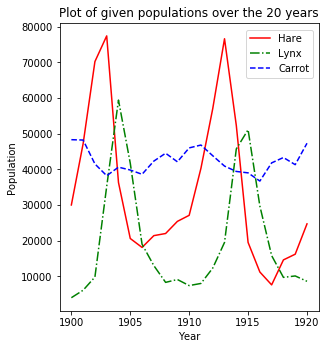

In [9]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt('populations.txt')
years, hares, lynxes, carrots = data.T

plt.axes([0, 0, 0.6, 1])
plt.plot(years, hares, 'r-', years, lynxes, 'g-.', years, carrots, 'b--')
plt.legend(('Hare', 'Lynx', 'Carrot'), loc=(0.72, 0.81))
plt.title("Plot of given populations over the 20 years")
plt.xlabel('Year')
plt.ylabel('Population')

plt.show()

## Exercise 2

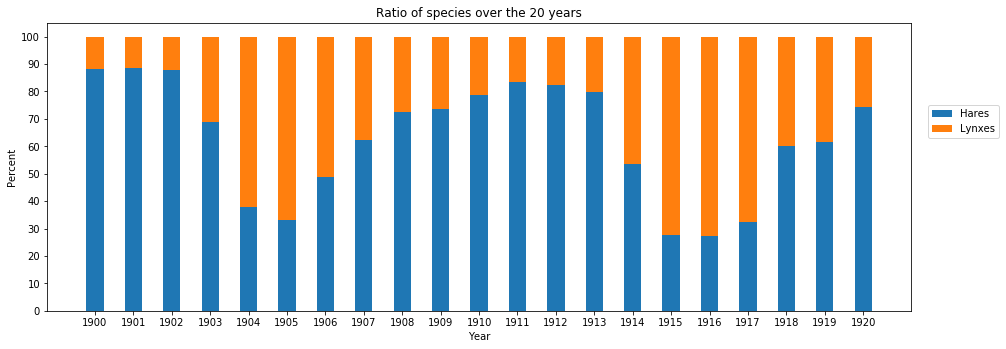

In [2]:
ind = np.arange(21)
width = 0.45
popsum = hares + lynxes

plt.axes([0, 0, 2, 1])
p1 = plt.bar(ind, 100*hares/popsum, width)
p2 = plt.bar(ind, 100*lynxes/popsum, width, bottom=100*hares/popsum)

plt.ylabel('Percent')
plt.xlabel('Year')
plt.title('Ratio of species over the 20 years')
plt.xticks(ind, years.astype(int))
plt.yticks(np.arange(0, 101, 10))
plt.legend((p1[0], p2[0]), ('Hares', 'Lynxes'), loc = (1.02, 0.6))

plt.show()

## Exercise 3

Mean (h, l, c): [34080.95238095 20166.66666667 42400.        ]
Std (h, l, c):  [20897.90645809 16254.59153691  3322.50622558]


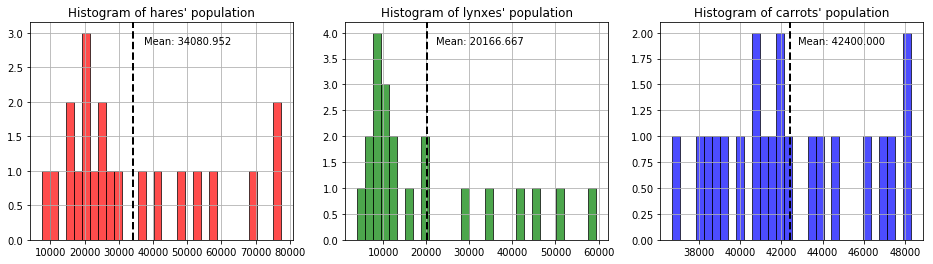

In [3]:
pops = data[:, 1:]
print("Mean (h, l, c):", pops.mean(axis=0))
print("Std (h, l, c): ", pops.std(axis=0))

plt.figure(1, figsize = (16, 4))

plt.subplot(131)
n, bins, patches = plt.hist(hares, 30, color = 'r', edgecolor='k', alpha=0.7)
plt.axvline(hares.mean(), color='k', linestyle='dashed', linewidth=2)
plt.grid(True)
plt.title("Histogram of hares' population")
_, max_ = plt.ylim()
plt.text(hares.mean() + hares.mean()/10, max_ - max_/10, 'Mean: {:.3f}'.format(hares.mean()))

plt.subplot(132)
n, bins, patches = plt.hist(lynxes, 30, color = 'g', edgecolor='k', alpha=0.7)
plt.axvline(lynxes.mean(), color='k', linestyle='dashed', linewidth=2)
plt.grid(True)
plt.title("Histogram of lynxes' population")
_, max_ = plt.ylim()
plt.text(lynxes.mean() + lynxes.mean()/10, max_ - max_/10, 'Mean: {:.3f}'.format(lynxes.mean()))

plt.subplot(133)
n, bins, patches = plt.hist(carrots, 30, color = 'b', edgecolor='k', alpha=0.7)
plt.axvline(carrots.mean(), color='k', linestyle='dashed', linewidth=2)
plt.grid(True)
plt.title("Histogram of carrots' population")
_, max_ = plt.ylim()
plt.text(carrots.mean() + carrots.mean()/100, max_ - max_/10, 'Mean: {:.3f}'.format(carrots.mean()))

plt.show()

## Exercise 4

Years of the largest populations (h, l, c): [1903. 1904. 1900.]


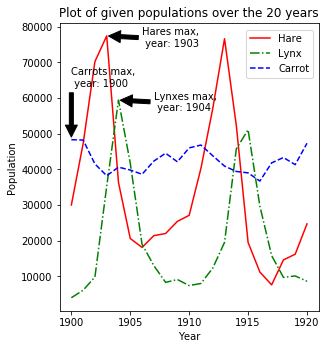

In [4]:
ymax = years[np.argmax(pops, axis=0)]
print("Years of the largest populations (h, l, c):", ymax)
plt.axes([0, 0, 0.6, 1])
plt.plot(years, hares, 'r-', years, lynxes, 'g-.', years, carrots, 'b--')
plt.legend(('Hare', 'Lynx', 'Carrot'), loc=(0.72, 0.81))
plt.title("Plot of given populations over the 20 years")
plt.xlabel('Year')
plt.ylabel('Population')
plt.annotate('Hares max,\n year: {}'.format(int(ymax[0])), xy=(ymax[0], hares.max()), 
             xytext=(ymax[0] + 3, hares.max() - 3000), arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate('Lynxes max,\n year: {}'.format(int(ymax[1])), xy=(ymax[1], lynxes.max()), 
             xytext=(ymax[1] + 3, lynxes.max() - 3000), arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate('Carrots max,\n year: {}'.format(int(ymax[2])), xy=(ymax[2], carrots.max()), 
             xytext=(ymax[2], carrots.max() + 15000), arrowprops=dict(facecolor='black', shrink=0.05))

plt.show()

## Exercise 5

['H' 'H' 'H' 'H' 'L' 'L' 'L' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'L' 'L' 'L'
 'H' 'H' 'H']


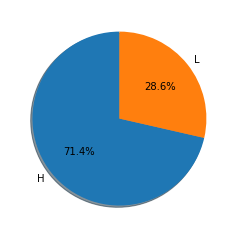

In [5]:
maxsp = np.array(['H', 'L'])[np.argmax(pops[:,0:2], axis=1)]
print(maxsp)
labels = 'H', 'L'
u, sizes = np.unique(maxsp, return_counts=True)
plt.pie(sizes/21, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
plt.show()

## Exercise 6

Any-is-above-50000 years: [1902. 1903. 1904. 1912. 1913. 1914. 1915.]


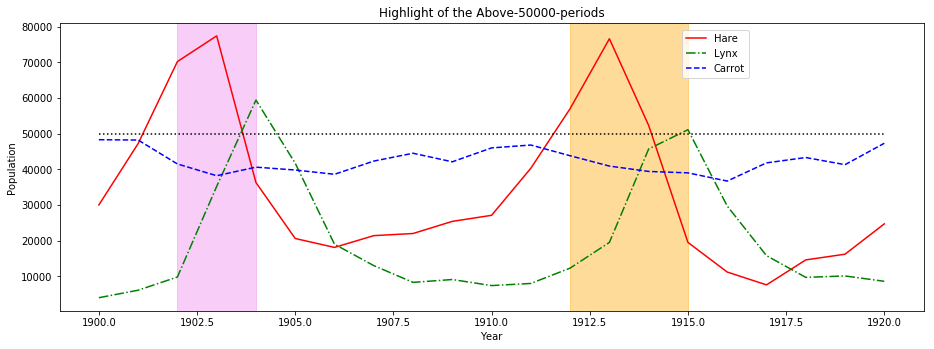

In [6]:
above = years[np.any(pops > 50000, axis=1)]
print("Any-is-above-50000 years:", above)

plt.axes([0, 0, 2, 1])
plt.plot(years, hares, 'r-', years, lynxes, 'g-.', years, carrots, 'b--')
plt.legend(('Hare', 'Lynx', 'Carrot'), loc=(0.72, 0.81))
plt.title("Highlight of the Above-50000-periods")
plt.xlabel('Year')
plt.ylabel('Population')
plt.plot(years, 50000*np.ones(21), 'k:')
plt.axvspan(above[0], above[2], color='violet', alpha=0.4)
plt.axvspan(above[3], above[6], color='orange', alpha=0.4)

plt.show()

## Exercise 7

In [7]:
print("Top 2 years for each species when they had the lowest populations (h, l, c):")
print(years[np.argsort(pops, axis=0)[:2]])

Top 2 years for each species when they had the lowest populations (h, l, c):
[[1917. 1900. 1916.]
 [1916. 1901. 1903.]]


## Exercise 8

Correlation coefficient is  -0.9179248480315341


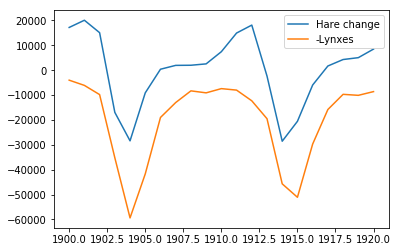

In [8]:
harechange = np.gradient(hares, 1.0)
print("Correlation coefficient is ", np.corrcoef(harechange, lynxes)[0,1])
plt.plot(years, harechange, years, -lynxes)
plt.legend(("Hare change", "-Lynxes"))
plt.show()